In [4]:
cd /Users/louis/Desktop/MSPA/basic machine learning/final/the-movies-dataset

/Users/louis/Desktop/MSPA/basic machine learning/final/the-movies-dataset


In [5]:
import numpy as np
import pandas as pd
import json
import ast
from collections import defaultdict

In [6]:
ls

__pycache__/           genres.csv             movies_metadata.csv*
actors.csv             hybrid.py              ratings.csv*
content based 2.py     keywords.csv*          ratings_small.csv*
content_based.py       keywords_2.csv         rmse.pickle
credits.csv*           links.csv*             sigweight.py
directors.csv          links_small.csv*       testet.csv
film.csv               load_file.py           tmdb_5000_credits.csv*
film_cleaned.csv       main.py                tmdb_5000_movies.csv*
fixed.py*              make_tfidf.py          trainset.csv


In [4]:
def load_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(ast.literal_eval)
    return df

In [5]:
credits = load_credits("credits.csv")

In [6]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [7]:
credits['cast'][0][0]

{'cast_id': 14,
 'character': 'Woody (voice)',
 'credit_id': '52fe4284c3a36847f8024f95',
 'gender': 2,
 'id': 31,
 'name': 'Tom Hanks',
 'order': 0,
 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}

In [8]:
credits['crew'][0][0]

{'credit_id': '52fe4284c3a36847f8024f49',
 'department': 'Directing',
 'gender': 2,
 'id': 7879,
 'job': 'Director',
 'name': 'John Lasseter',
 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}

In [9]:
def load_keywords(path):
    df = pd.read_csv(path)
    df['keywords'] = df['keywords'].apply(ast.literal_eval)
    return df

In [10]:
keyw = load_keywords('keywords.csv')

In [11]:
keyw['keywords'][0]

[{'id': 931, 'name': 'jealousy'},
 {'id': 4290, 'name': 'toy'},
 {'id': 5202, 'name': 'boy'},
 {'id': 6054, 'name': 'friendship'},
 {'id': 9713, 'name': 'friends'},
 {'id': 9823, 'name': 'rivalry'},
 {'id': 165503, 'name': 'boy next door'},
 {'id': 170722, 'name': 'new toy'},
 {'id': 187065, 'name': 'toy comes to life'}]

In [12]:
keyw.isnull().sum()

id          0
keywords    0
dtype: int64

In [7]:
data = pd.read_csv('movies_metadata.csv')

/Users/louis/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## build a dataframe for each film with following features:
['id','title','director','genre','popularity','actor']

## extract keywords

In [14]:
keywords_set = []
kw_dict = defaultdict(int)
for i in range(keyw.shape[0]):
    word_list = keyw['keywords'][i]
    for j in word_list:
        kw_dict[j['name']] += 1
    tmp = "|".join(j['name'] for j in word_list)
    keywords_set.append(tmp)

In [15]:
keyw.iloc[7]

id          45325
keywords       []
Name: 7, dtype: object

In [16]:
keywords_set[0]

'jealousy|toy|boy|friendship|friends|rivalry|boy next door|new toy|toy comes to life'

In [17]:
kw_dict['boy']

68

In [18]:
len(kw_dict)

19956

In [19]:
kw_list = list(kw_dict.items())

In [20]:
kw_list[:3]

[('jealousy', 197), ('toy', 19), ('boy', 68)]

In [21]:
kw_list.sort(key = lambda x:x[1], reverse = True)

In [22]:
kw_list[:3]

[('woman director', 3115), ('independent film', 1930), ('murder', 1308)]

In [23]:
keyw_df = pd.DataFrame(list(kw_dict.items()), columns = ['keyword','count'])

In [24]:
keyw_df.iloc[keyw_df['count'].idxmax()]

keyword    woman director
count                3115
Name: 132, dtype: object

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

/Users/louis/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


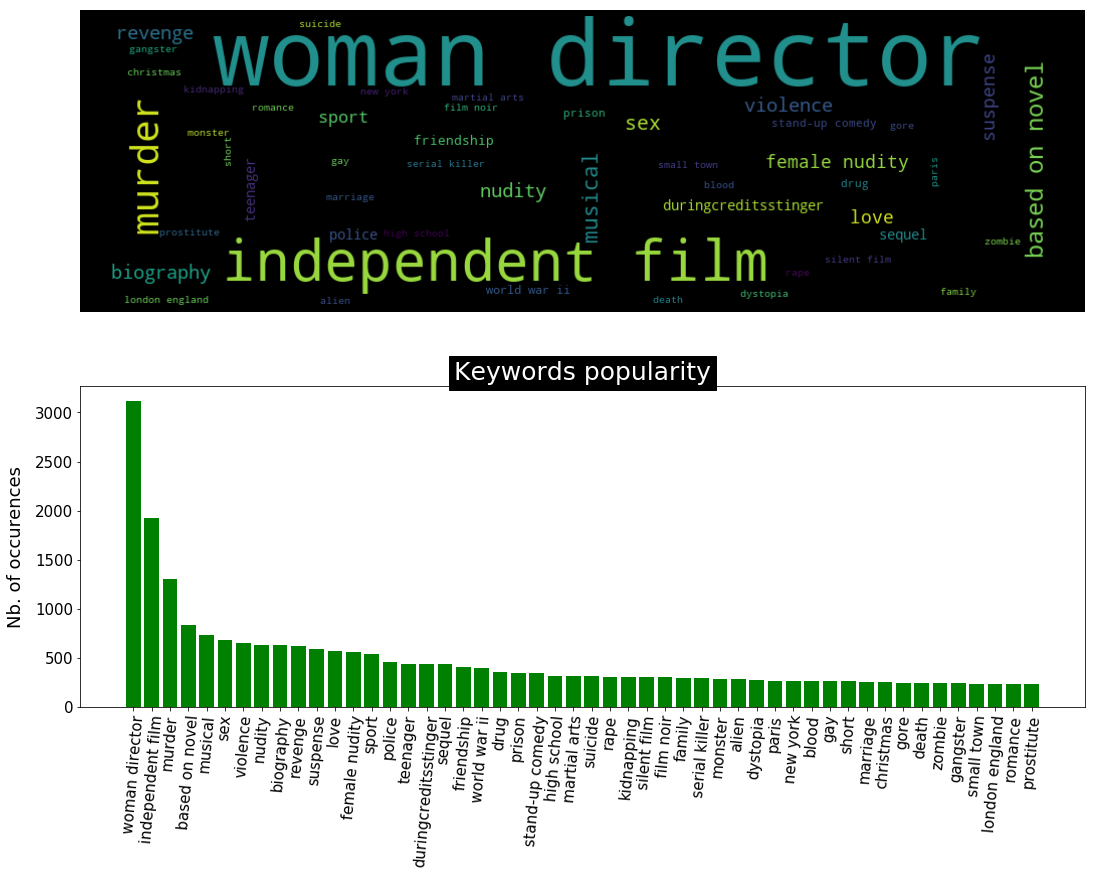

In [27]:
trunc_occurences = kw_list[:50]
words = dict()
for s in trunc_occurences:
    words[s[0]] = s[1]
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

## extract directors

In [28]:
director_set = []
dir_dict = defaultdict(int)
for i in range(credits.shape[0]):
    cast_list = credits['crew'][i]
    for j in cast_list: 
        if j['job'] == 'Director':
            dir_dict[j['name']] += 1
    tmp = "|".join(j['name'] for j in cast_list if j['job'] == 'Director')
    director_set.append(tmp)

In [29]:
director_set[:3]

['John Lasseter', 'Joe Johnston', 'Howard Deutch']

In [30]:
dir_dict['John Lasseter']

10

In [31]:
len(dir_dict)

19740

In [32]:
dir_df = pd.DataFrame(list(dir_dict.items()), columns = ['director','count'])

In [33]:
dir_df.head()

,director,count
0,John Lasseter,10
1,Joe Johnston,10
2,Howard Deutch,11
3,Forest Whitaker,4
4,Charles Shyer,7


## extract actors

In [34]:
actors_set = []
act_dict = defaultdict(int)
for i in range(credits.shape[0]):
    cast_list = credits['cast'][i]
    for j in cast_list:
        act_dict[j['name']] += 1
    tmp = "|".join(j['name'] for j in cast_list)
    actors_set.append(tmp)

In [35]:
act_dict['Tom Hanks']

72

In [36]:
actors_set[:2]

['Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette',
 'Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup|Leonard Zola|Lloyd Berry|Malcolm Stewart|Annabel Kershaw|Darryl Henriques|Robyn Driscoll|Peter Bryant|Sarah Gilson|Florica Vlad|June Lion|Brenda Lockmuller']

In [37]:
act_df = pd.DataFrame(list(act_dict.items()), columns = ['actor','count'])

In [38]:
act_df.head()

,actor,count
0,Tom Hanks,72
1,Tim Allen,29
2,Don Rickles,29
3,Jim Varney,20
4,Wallace Shawn,75


## build movieid, imdbid, tmdbid dataframe

In [39]:
ur = pd.read_csv('ratings_small.csv')

In [40]:
links = pd.read_csv('links.csv')

In [41]:
id_rating = pd.merge(ur, links, on = ['movieId'])

In [42]:
id_rating.head()

,userId,movieId,rating,imdbId,tmdbId
0,1,31,2.5,112792,9909.0
1,7,31,3.0,112792,9909.0
2,31,31,4.0,112792,9909.0
3,32,31,4.0,112792,9909.0
4,36,31,3.0,112792,9909.0


## genres

In [43]:
def make_json(cur_data, cols):
    new_data = cur_data[cols].apply(ast.literal_eval)
    return new_data

In [44]:
data.head().T

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [45]:
col = 'genres'
genres_data = make_json(data, col)

In [46]:
genres_data[0][0]['name']

'Animation'

In [47]:
genres_set = []
gen_dict = defaultdict(int)
for i in range(len(genres_data)):
    genres_list = genres_data[i]
    for j in genres_list:
        gen_dict[j['name']] += 1
    gen = "|".join(j['name'] for j in genres_list)
    genres_set.append(gen)

In [48]:
genres_set[0]

'Animation|Comedy|Family'

In [49]:
gen_dict['Drama']

20265

In [50]:
gen_dict

defaultdict(int,
            {'Action': 6596,
             'Adventure': 3496,
             'Animation': 1935,
             'Aniplex': 1,
             'BROSTA TV': 1,
             'Carousel Productions': 1,
             'Comedy': 13182,
             'Crime': 4307,
             'Documentary': 3932,
             'Drama': 20265,
             'Family': 2770,
             'Fantasy': 2313,
             'Foreign': 1622,
             'GoHands': 1,
             'History': 1398,
             'Horror': 4673,
             'Mardock Scramble Production Committee': 1,
             'Music': 1598,
             'Mystery': 2467,
             'Odyssey Media': 1,
             'Pulser Productions': 1,
             'Rogue State': 1,
             'Romance': 6735,
             'Science Fiction': 3049,
             'Sentai Filmworks': 1,
             'TV Movie': 767,
             'Telescene Film Group Productions': 1,
             'The Cartel': 1,
             'Thriller': 7624,
             'Vision View Entertai

In [51]:
gen_df = pd.DataFrame(list(gen_dict.items()), columns = ['genre','count'])

In [52]:
gen_df

,genre,count
0,Animation,1935
1,Comedy,13182
2,Family,2770
3,Adventure,3496
4,Fantasy,2313
5,Romance,6735
6,Drama,20265
7,Action,6596
8,Crime,4307
9,Thriller,7624


## extract popularity ,title, vote_count, vote_average and clean data

In [53]:
data.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [54]:
np.where(np.isnan(data.vote_count))

(array([19729, 19730, 29502, 29503, 35586, 35587]),)

In [55]:
data.iloc[35587]

adult                     Avalanche Sharks tells the story of a bikini ...
belongs_to_collection                                             2.185485
budget                                    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
genres                   [{'name': 'Odyssey Media', 'id': 17161}, {'nam...
homepage                          [{'iso_3166_1': 'CA', 'name': 'Canada'}]
id                                                              2014-01-01
imdb_id                                                                  0
original_language                                                     82.0
original_title                    [{'iso_639_1': 'en', 'name': 'English'}]
overview                                                          Released
popularity                                           Beware Of Frost Bites
poster_path                                               Avalanche Sharks
production_companies                                                 False
production_countries     

In [56]:
data2 = data.drop(data[data.vote_count.isnull()].index, axis = 0)

In [57]:
data2.isnull().sum()

adult                        0
belongs_to_collection    40970
budget                       0
genres                       0
homepage                 37682
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   0
poster_path                383
production_companies         0
production_countries         0
release_date                84
revenue                      0
runtime                    257
spoken_languages             0
status                      81
tagline                  25048
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

In [58]:
data2.popularity = data2.popularity.astype("float64")

In [59]:
data2.describe()

,popularity,revenue,runtime,vote_average,vote_count
count,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [60]:
data2[data2.popularity == max(data2.popularity)]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
30700,False,"{'id': 86066, 'name': 'Despicable Me Collectio...",74000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.minionsmovie.com/,211672,tt2293640,en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",...,2015-06-17,1.156731e+09,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Before Gru, they had a history of bad bosses",Minions,False,6.4,4729.0


In [61]:
films = data2[['id','title','popularity','vote_average','vote_count']]

In [62]:
films.head()

,id,title,popularity,vote_average,vote_count
0,862,Toy Story,21.946943,7.7,5415.0
1,8844,Jumanji,17.015539,6.9,2413.0
2,15602,Grumpier Old Men,11.712900,6.5,92.0
3,31357,Waiting to Exhale,3.859495,6.1,34.0
4,11862,Father of the Bride Part II,8.387519,5.7,173.0


## concatenate all dataframes together as our final dataframe for content analysis

In [63]:
def make_dataframe(l,n):
    tmp = pd.Series(l)
    return pd.DataFrame(tmp,columns = [n])

In [64]:
actors_data = make_dataframe(actors_set,'actors')
keywords_data = make_dataframe(keywords_set,'keywords')
genres_data = make_dataframe(genres_set,'genres')
directors_data = make_dataframe(director_set,'directors')

In [65]:
print(actors_data.shape,keywords_data.shape,genres_data.shape,directors_data.shape)

(45476, 1) (46419, 1) (45466, 1) (45476, 1)


In [66]:
print(films.shape, credits.shape, keyw.shape)

(45460, 5) (45476, 3) (46419, 2)


In [67]:
genres_data.drop(data[data.vote_count.isnull()].index, axis = 0, inplace=True)

In [68]:
genres_data.shape

(45460, 1)

In [69]:
films = pd.concat([films, genres_data], axis = 1)

In [70]:
films.head()

,id,title,popularity,vote_average,vote_count,genres
0,862,Toy Story,21.946943,7.7,5415.0,Animation|Comedy|Family
1,8844,Jumanji,17.015539,6.9,2413.0,Adventure|Fantasy|Family
2,15602,Grumpier Old Men,11.712900,6.5,92.0,Romance|Comedy
3,31357,Waiting to Exhale,3.859495,6.1,34.0,Comedy|Drama|Romance
4,11862,Father of the Bride Part II,8.387519,5.7,173.0,Comedy


In [72]:
films.isnull().sum()

id              0
title           0
popularity      0
vote_average    0
vote_count      0
genres          0
dtype: int64

In [73]:
keywords = pd.concat([keyw.id, keywords_data], axis = 1)

In [74]:
keywords.iloc[7]

id          45325
keywords         
Name: 7, dtype: object

In [75]:
dir_act = pd.concat([credits.id, directors_data, actors_data], axis = 1)

In [76]:
dir_act.head()

,id,directors,actors
0,862,John Lasseter,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1,8844,Joe Johnston,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2,15602,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3,31357,Forest Whitaker,Whitney Houston|Angela Bassett|Loretta Devine|...
4,11862,Charles Shyer,Steve Martin|Diane Keaton|Martin Short|Kimberl...


In [77]:
dir_act.dtypes

id            int64
directors    object
actors       object
dtype: object

In [78]:
tmp_data = pd.merge(films,keywords)

In [79]:
films.id = films.id.astype("int64")

In [80]:
tmp_data = pd.merge(films, keywords, how = 'inner', on = 'id')

In [81]:
final_data = pd.merge(tmp_data, dir_act, on = 'id')

In [82]:
final_data.head(10)

,id,title,popularity,vote_average,vote_count,genres,keywords,directors,actors
0,862,Toy Story,21.946943,7.7,5415.0,Animation|Comedy|Family,jealousy|toy|boy|friendship|friends|rivalry|bo...,John Lasseter,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1,8844,Jumanji,17.015539,6.9,2413.0,Adventure|Fantasy|Family,board game|disappearance|based on children's b...,Joe Johnston,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2,15602,Grumpier Old Men,11.712900,6.5,92.0,Romance|Comedy,fishing|best friend|duringcreditsstinger|old men,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3,31357,Waiting to Exhale,3.859495,6.1,34.0,Comedy|Drama|Romance,based on novel|interracial relationship|single...,Forest Whitaker,Whitney Houston|Angela Bassett|Loretta Devine|...
4,11862,Father of the Bride Part II,8.387519,5.7,173.0,Comedy,baby|midlife crisis|confidence|aging|daughter|...,Charles Shyer,Steve Martin|Diane Keaton|Martin Short|Kimberl...
5,949,Heat,17.924927,7.7,1886.0,Action|Crime|Drama|Thriller,robbery|detective|bank|obsession|chase|shootin...,Michael Mann,Al Pacino|Robert De Niro|Val Kilmer|Jon Voight...
6,11860,Sabrina,6.677277,6.2,141.0,Comedy|Romance,paris|brother brother relationship|chauffeur|l...,Sydney Pollack,Harrison Ford|Julia Ormond|Greg Kinnear|Angie ...
7,45325,Tom and Huck,2.561161,5.4,45.0,Action|Adventure|Drama|Family,,Peter Hewitt,Jonathan Taylor Thomas|Brad Renfro|Rachael Lei...
8,9091,Sudden Death,5.231580,5.5,174.0,Action|Adventure|Thriller,terrorist|hostage|explosive|vice president,Peter Hyams,Jean-Claude Van Damme|Powers Boothe|Dorian Har...
9,710,GoldenEye,14.686036,6.6,1194.0,Adventure|Action|Thriller,cuba|falsely accused|secret identity|computer ...,Martin Campbell,Pierce Brosnan|Sean Bean|Izabella Scorupco|Fam...


In [90]:
final_data.dtypes

id                int64
title            object
popularity      float64
vote_average    float64
vote_count      float64
genres           object
keywords         object
directors        object
actors           object
dtype: object

In [83]:
final_data.isnull().sum()

id              0
title           0
popularity      0
vote_average    0
vote_count      0
genres          0
keywords        0
directors       0
actors          0
dtype: int64

## save useful dataframe

In [84]:
final_data.to_csv('film.csv', index = None)

In [85]:
act_df.to_csv("actors.csv", index = None)
dir_df.to_csv("directors.csv", index = None)
keyw_df.to_csv("keywords_2.csv", index = None)
gen_df.to_csv("genres.csv", index = None)